# Using clustering algorithms for simple datasets

## Create synthetic dataset

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random

def get_sin_wave(noise = 0.05, points = 1000):
    
    sin_wave = []
    c = 0.1
    for i in range(points):
        n = random.random()*noise
        sin_wave.append(c*i+10*math.sin(i*0.5+n)+3*math.sin(i*0.1))
    
    sin_wave = np.array(sin_wave)
    
    return sin_wave

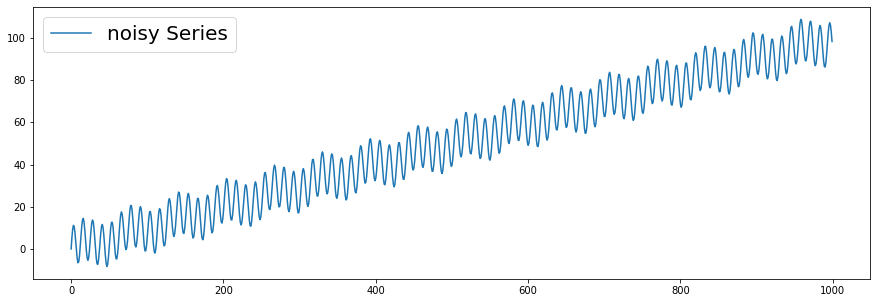

In [2]:
sin_wave = get_sin_wave(noise=0.0)
sin_wave = sin_wave.reshape(-1, 1)

plt.figure(figsize=(15, 5))
plt.plot(sin_wave, label='noisy Series')
plt.legend(fontsize=20)
plt.show()

## Cluster this simple dataset

In [3]:
from sklearn.cluster import KMeans

In [4]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(sin_wave)
x = [i for i in range(len(y_pred))]

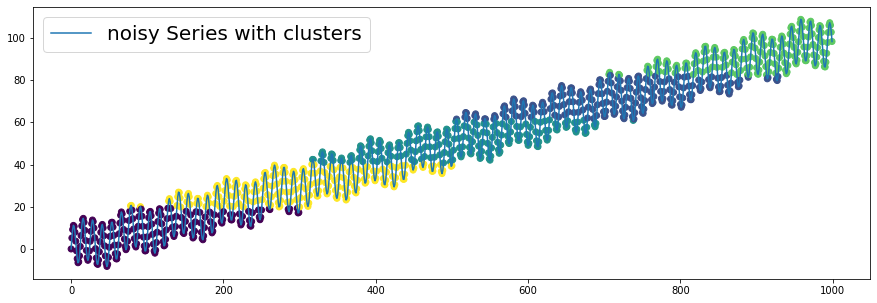

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(sin_wave, label='noisy Series with clusters')
plt.scatter(x, sin_wave, c=y_pred)
plt.legend(fontsize=20)
plt.show()